In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image
import numpy as np

matplotlib.rc('figure', figsize=(9, 6))
# plt.figure(figsize=(1,1))

In [3]:
df = pd.read_csv('../data/IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [4]:
df.sentiment.value_counts()

negative    25000
positive    25000
Name: sentiment, dtype: int64

### Sentiment Counts

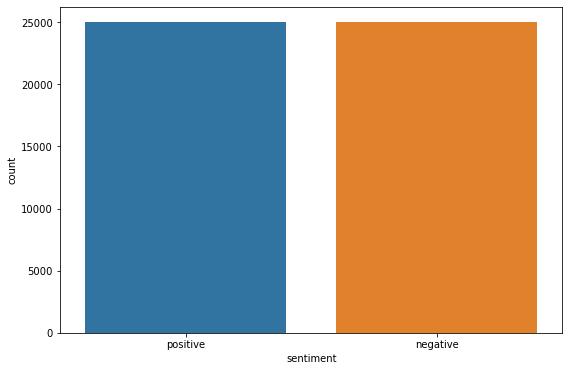

In [5]:
sns.countplot(df.sentiment)

### Word Cloud for Most Popular words in Reviews

In [6]:
remove_new_line = lambda x : x.replace("\n", "") if type(x) == str else ""

text = ' '.join([remove_new_line(review) for review in df.review])


In [7]:
# Remove HTML Tags
def remove_html(text):
    soup = BeautifulSoup(text,'lxml')
    html_free_text = soup.get_text()
    return html_free_text

In [8]:
text = remove_html(text)

In [9]:
text[:1000]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.I would say the main appeal of the show is due to the fact that it goes where other shows wo

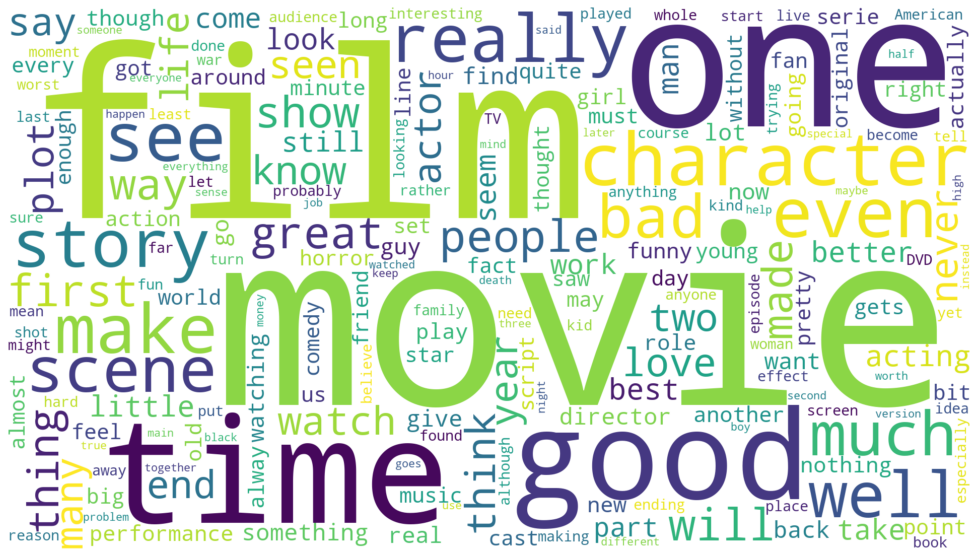

In [10]:
def generate_word_cloud(words):
    wordcloud = WordCloud(background_color = 'white',collocations=False,width=1920, height=1080).generate(str(words))
    plt.figure(figsize= (20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

generate_word_cloud(text)  

### Checking the length of Reviews

In [11]:
df['review_length'] = df['review'].apply(lambda x : len(x))

In [12]:
df.head()

review sentiment  review_length
0  One of the other reviewers has mentioned that ...  positive           1761
1  A wonderful little production. <br /><br />The...  positive            998
2  I thought this was a wonderful way to spend ti...  positive            926
3  Basically there's a family where a little boy ...  negative            748
4  Petter Mattei's "Love in the Time of Money" is...  positive           1317

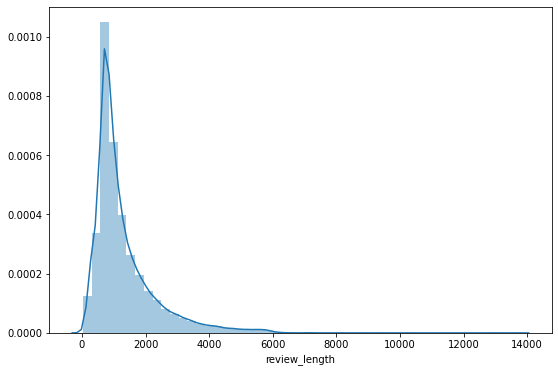

In [13]:
sns.distplot(df.review_length)

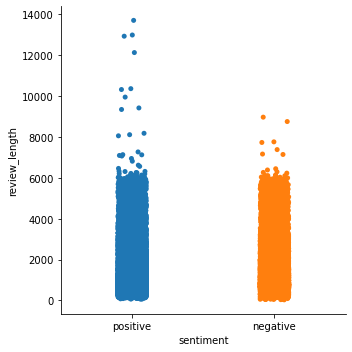

In [14]:
sns.catplot(x="sentiment", y="review_length", data=df)

In [16]:
len(df.sentiment.value_counts())

2